## Twitter US Airline Sentiment Analysis 
- Python · Twitter US Airline Sentiment

#### IMPORT LIBRARIES

In [1]:
# Basic operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE # handling Imbalanced dataset

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score # Perfomance Metrics

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud #  The wordcloud module in Python is used to generate word clouds. A word cloud is a visual representation of text data, where the size of each word is proportional to its frequency in the text. Word clouds can be used to identify the most important keywords in a text, to visualize the relationships between different words, and to create visually appealing and informative graphics.
from termcolor import cprint # The termcolor module in Python is used to colorize text output in the terminal. This can be useful for highlighting important information, making text more readable, and creating visually appealing output.Both of these modules can be used to create interesting and informative visualizations from text data. For example, you could use the wordcloud module to generate a word cloud of all the words in a tweet dataset. You could then use the termcolor module to colorize the word cloud based on the sentiment of the tweets. This would allow you to quickly identify the most common words in the tweets and to see how the sentiment of the tweets is distributed.
import seaborn as sns
import warnings   

warnings.filterwarnings('ignore')
%matplotlib inline



### Load The Data


In [2]:
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\Tweets.csv\\Tweets.csv")
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)


### Here is an explanation of the features in the US airline tweet sentimental dataset:

- __tweet_id:__ The unique identifier for the tweet.
- __airline_sentiment:__ The sentiment of the tweet towards the airline, which can be positive, negative, or neutral.
- __airline_sentiment_confidence:__ The confidence level of the sentiment classification.
- __negative_reason:__ The reason for the negative sentiment, if the tweet is negative.
- __negative_reason_confidence:__ The confidence level of the negative reason classification.
- __airline:__ The airline that the tweet is about.
- __airline_sentiment_gold:__ The gold label for the sentiment of the tweet, which is used for evaluation.
- __name:__ The name of the user who posted the tweet.
- __negative_reason_gold:__ The gold label for the reason for the negative sentiment, if the tweet is negative.
- __retweet_count:__ The number of times the tweet has been retweeted.
- __text:__ The full text of the tweet.
- __tweet_coord:__ The coordinates of the tweet, if available.
- __tweet_created:__ The date and time that the tweet was created.
- __tweet_location:__ The location of the user who posted the tweet, if available.
- __user_timezone:__ The time zone of the user who posted the tweet, if available.

These features can be used to train a machine learning model to classify the sentiment of tweets towards airlines. The model can also be used to identify the reasons for negative sentiment. This information can be used by airlines to improve their customer service and to address the concerns of their customers.

#### Here are some examples of how the features can be used:

- An airline could use the model to identify tweets that are negative towards them. The airline could then contact the customers who posted these tweets and try to resolve their issues.
- An airline could use the model to identify the most common reasons for negative sentiment. The airline could then address these issues in order to improve their customer service.
- A researcher could use the dataset to study the factors that influence the sentiment of tweets towards airlines. This research could be used to develop new strategies for improving customer satisfaction.

Overall, the US airline tweet sentimental dataset is a valuable resource for airlines, researchers, and anyone else who is interested in understanding the sentiment of tweets towards airlines.

### Now Check the Head and Tail of the dataset

In [3]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [4]:
df.tail()

tweet_id airline_sentiment  airline_sentiment_confidence  \
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
14635         NaN  2015-02-22 12:01:01 -0800            NaN   
14636         NaN  2015-02-22 11:59:46 -0800          Texas   
14637         NaN  2015-02-22 11:59:15 -0800  Nigeria,lagos   
14638         NaN  2015-02-22 11:59:02 -0800     New Jersey   
14639         NaN  2015-02-22 11:58:51 -0800     dallas, TX   

                    user_timezone  
14635                         NaN  
14636                         NaN  
14637                         NaN  
14638  Eastern Time (US & Canada)  
14639                         NaN

### EDA Part

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

#### std
The standard deviation, which is denoted by the symbol σ, is a measure of how spread out the values in a dataset are. A low standard deviation indicates that the values are close to the mean, while a high standard deviation indicates that the values are more spread out

In [7]:
df.shape

(14640, 15)

### Now Check Nan value in our dataset

In [8]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### DATA VISUALIZATION

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


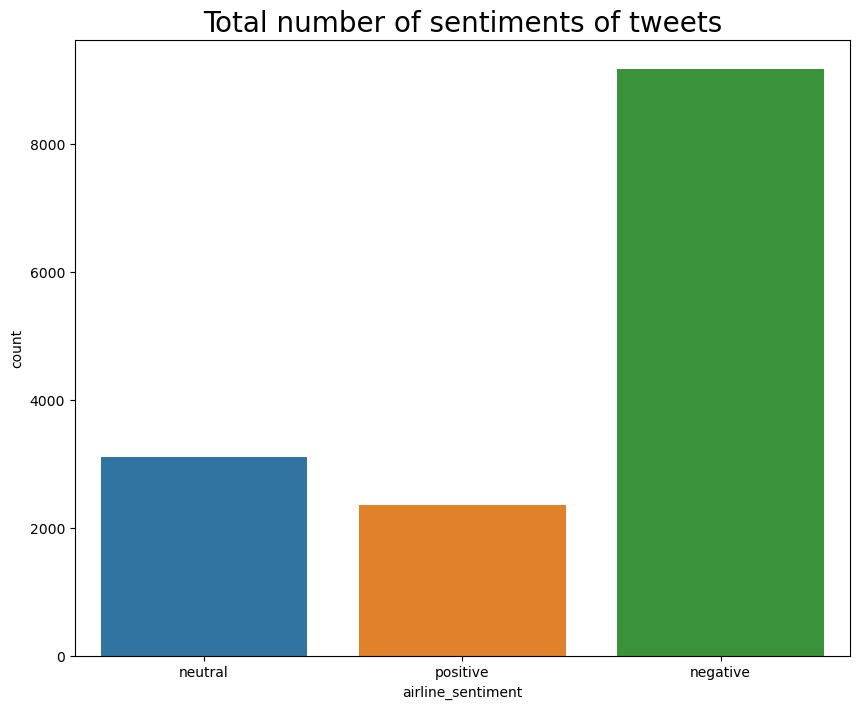

In [9]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())

# count plot
plt.figure(figsize=(10,8))
ax=sns.countplot(x='airline_sentiment',data=df)
ax.set_title(label='Total number of sentiments of tweets',fontsize=20)
plt.show()


### observation 
- as we can observe there are mostly negative tweets are there then neutral and then positive tweets are there  

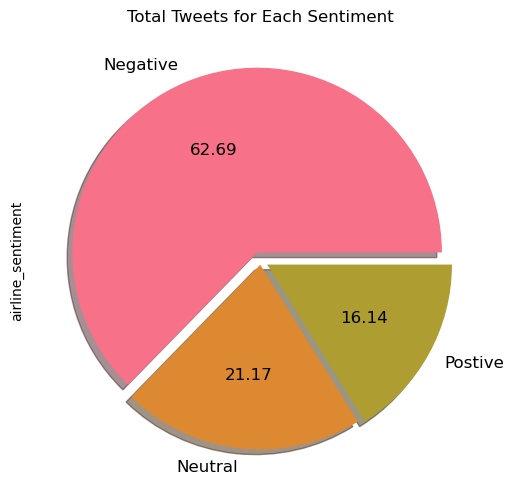

In [10]:
ax.set_title(label='Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")
plt.show()

### Observation
- there are lot of negative tweets which are 63 % of the tweets so most of the customers are showing the bad impression on the certain us airlines 

Text(0, 0.5, 'No of Tweets')

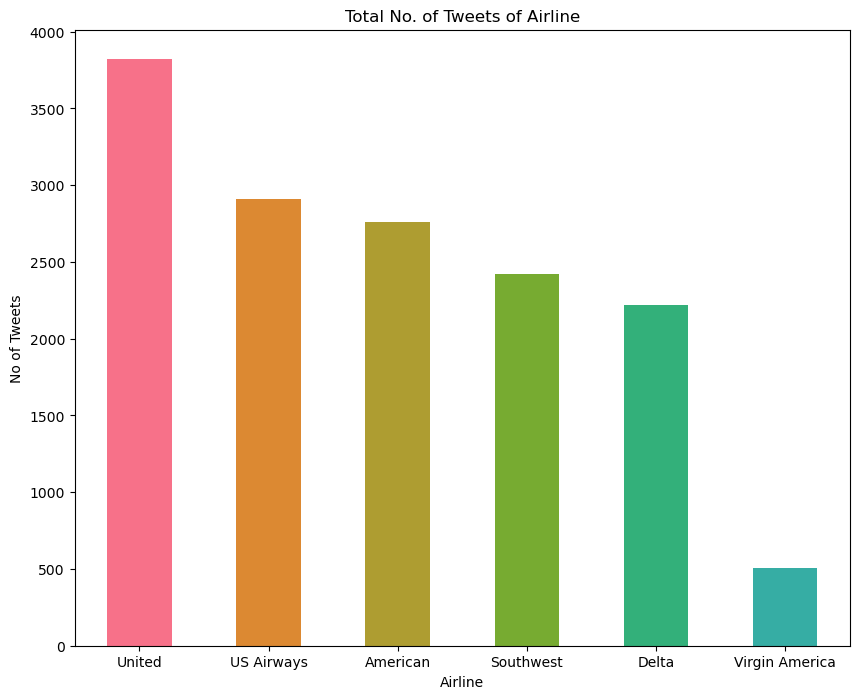

In [11]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind='bar',color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline') # The parameter rot in a bar plot controls the rotation of the x-axis labels. A value of rot=0 means that the labels are not rotated at all, while a value of rot=90 means that the labels are rotated 90 degrees counterclockwise.
plt.xlabel("Airline",fontsize=10)
plt.ylabel("No of Tweets",fontsize=10)

### observation 
- most of the people tweeted to the united airline 
- less no of people tweetd to the Virgin America airline


Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


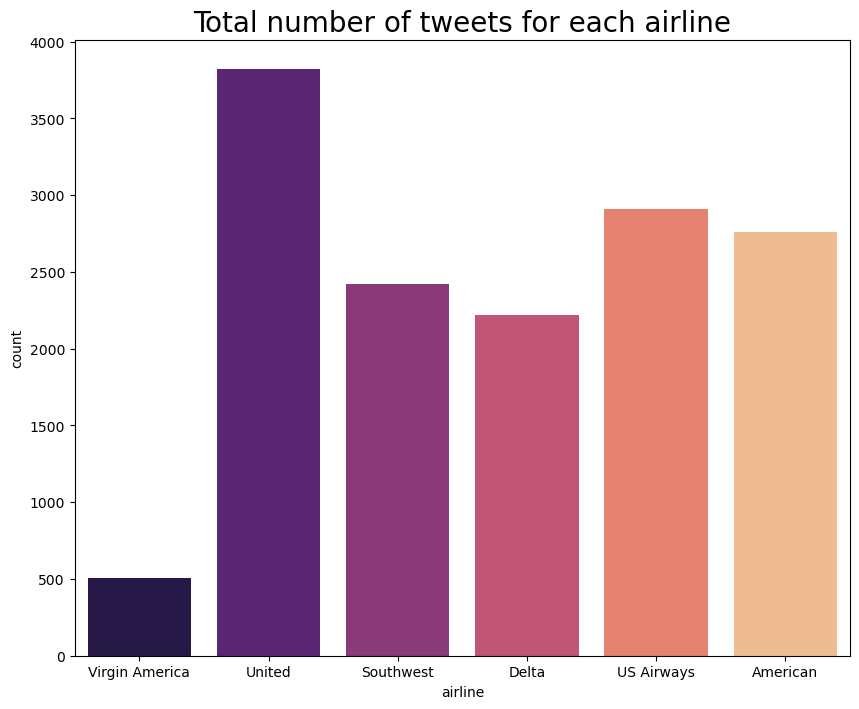

Total number of sentiment tweets for each airline :
US Airways : 
  negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
  negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
  negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
  negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
  negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
  negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [12]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize=(10,8))
ax=sns.countplot(x='airline',data=df,palette='magma')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()

cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines : # print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts()): This line prints the airline name (i) followed by a colon and a line break (\n). It then calls df.loc[df.airline == i] to filter the DataFrame df based on the condition df.airline == i. This filters the DataFrame to include only rows where the airline column matches the current airline name. After that, it selects the airline_sentiment column from the filtered DataFrame and calls value_counts() on it. This counts the number of occurrences of each unique value in the airline_sentiment column and returns a Series with the sentiment values as the index and the counts as the values. Finally, the line prints the result of value_counts().
    print('{} : \n '.format(i),df.loc[df.airline==i].airline_sentiment.value_counts()) # format(i) allows us to insert values into the strings at specific positions

### Now Reasons Of Negative Tweets

Reasons Of Negative Tweets :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


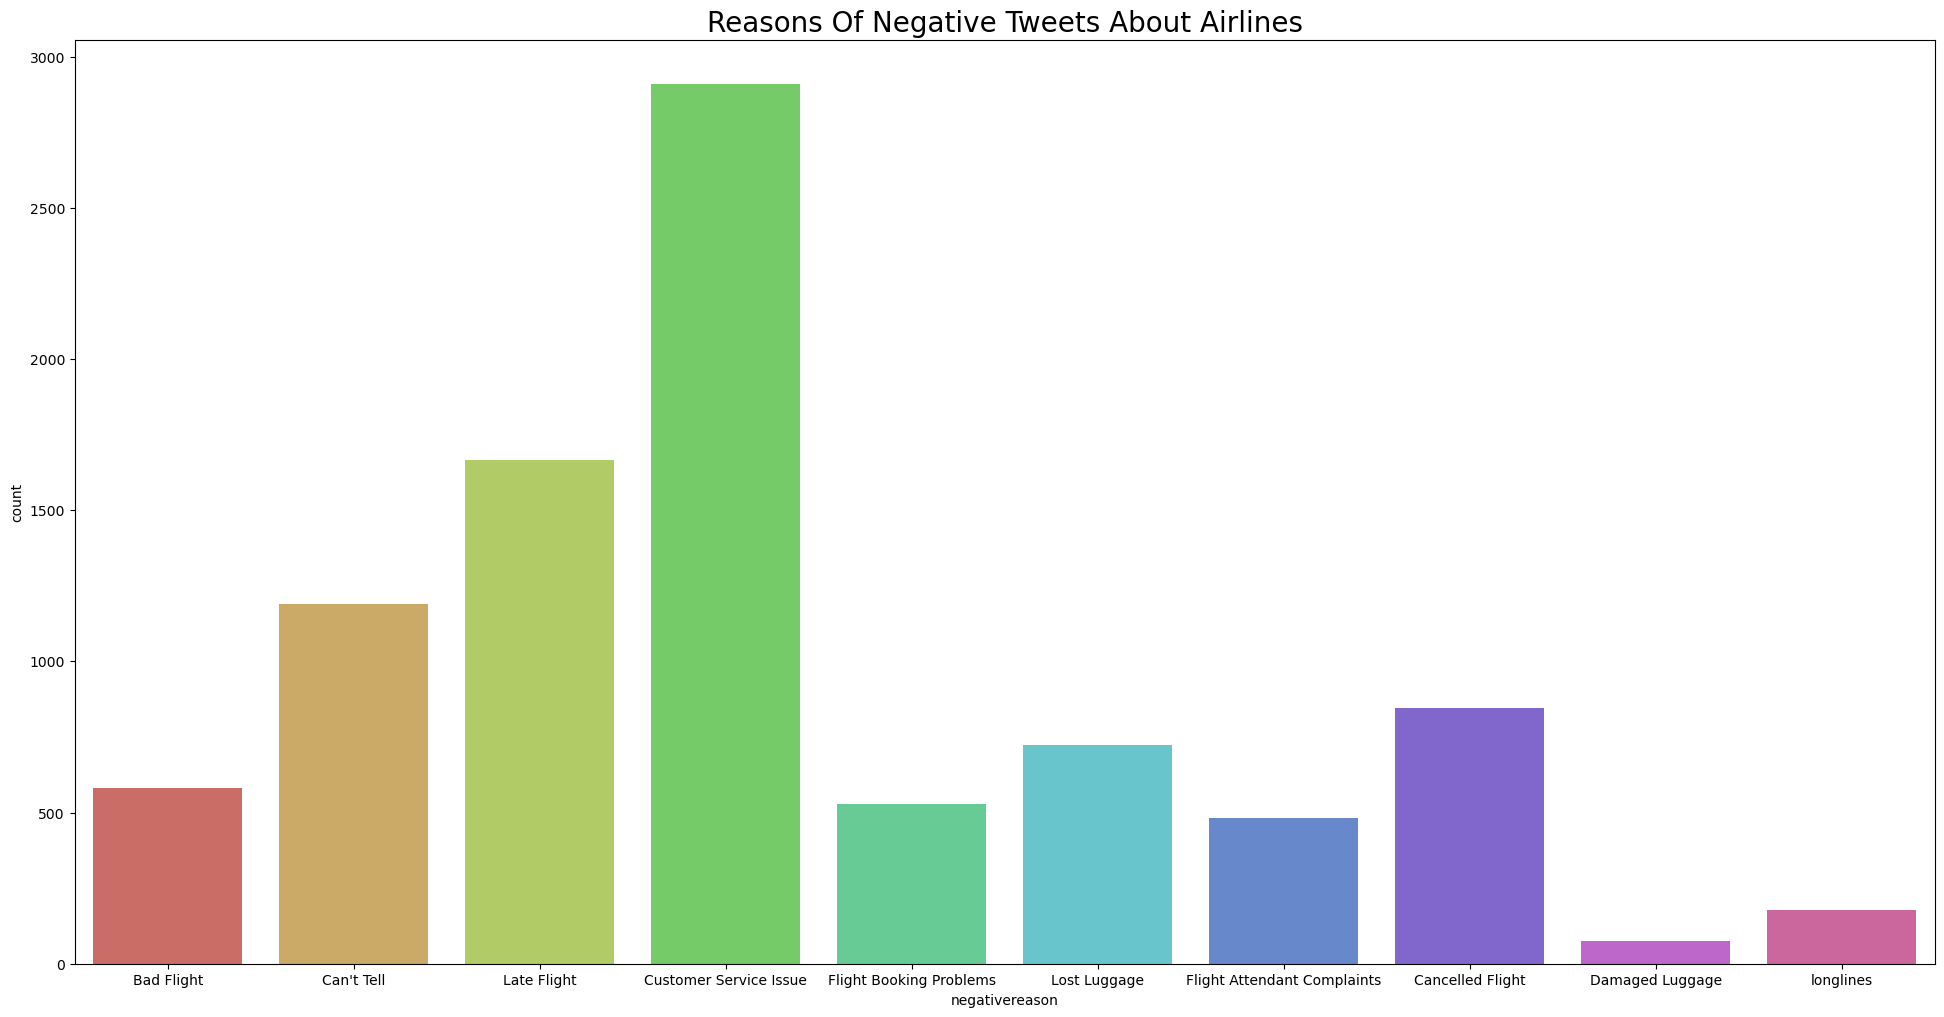

In [13]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize=(24,12))
sns.countplot(x='negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

### Observation
- there are lot of customer service issue negative reviews are there 

### Now Reasons Of Negative Tweets on Every AirLine Company

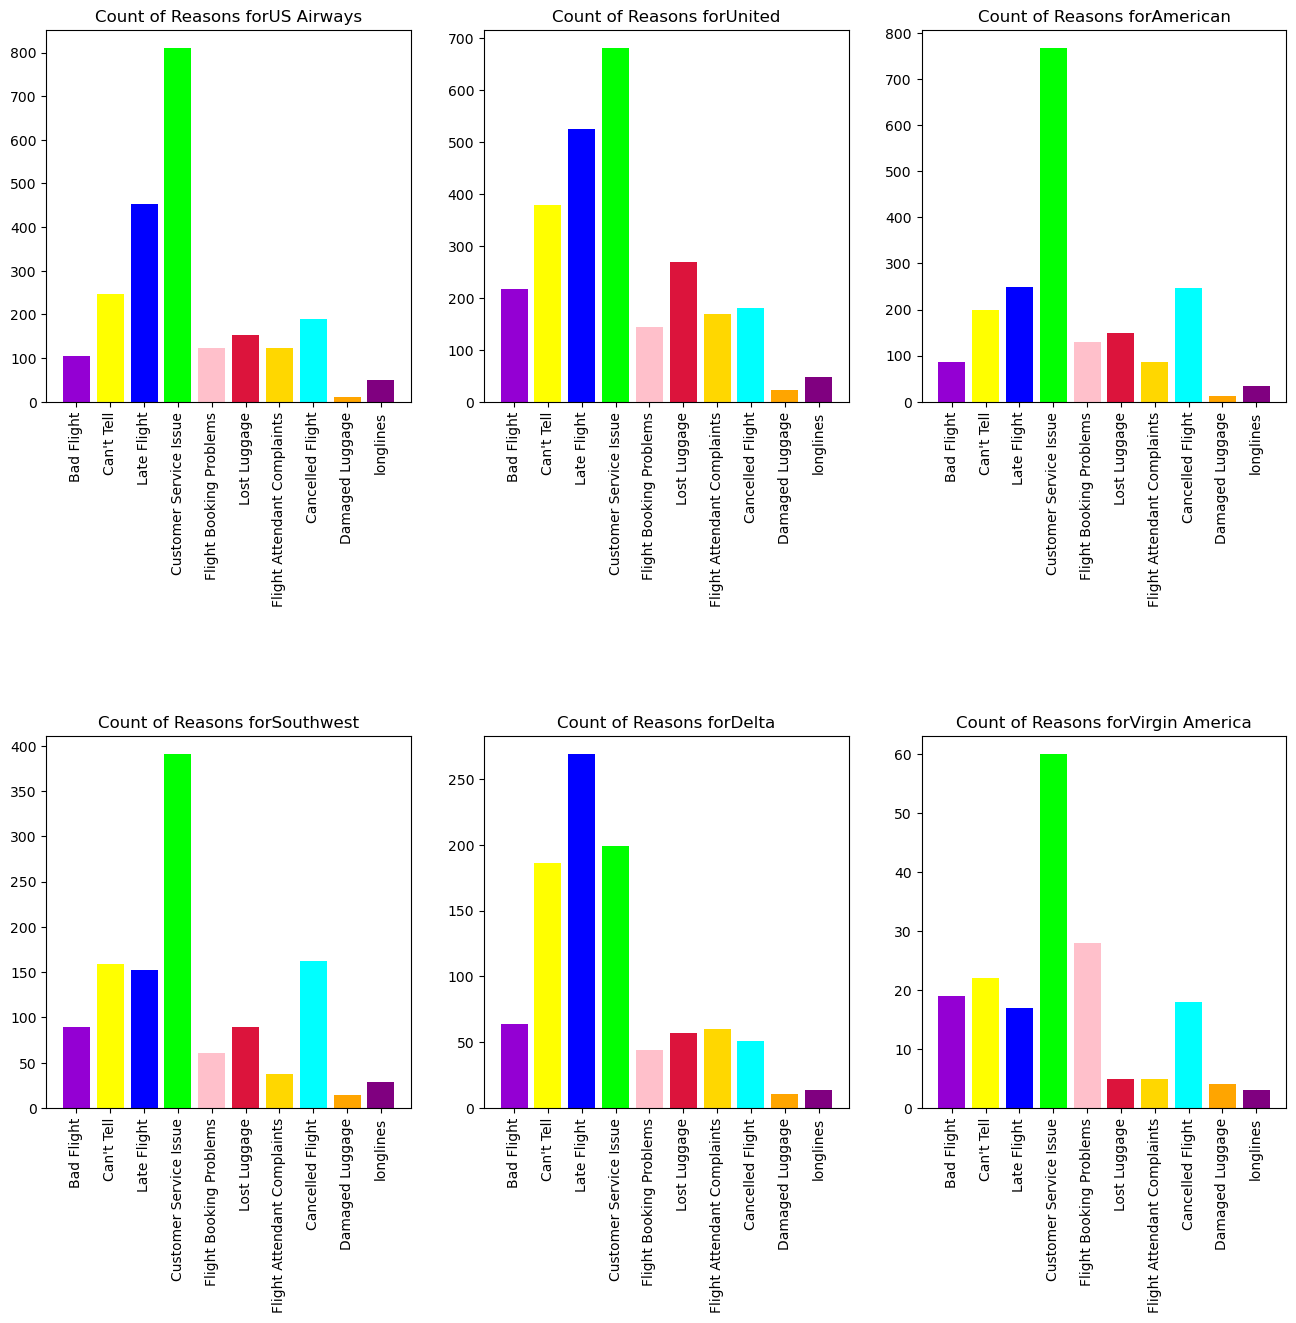

In [14]:
NR_count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName=df[df['airline']==Airline]
    count=airlineName['negativereason'].value_counts()
    unique_reason=df['negativereason'].unique()
    unique_reason=[x for x in unique_reason if str(x) !='nan']
    Reason_frame=pd.DataFrame({'Reasons':unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    
    return Reason_frame

def Plot_Reason(airline):
    a=NCount(airline)
    count=a['count']
    Id=range(1,(len(a)+1))
    plt.bar(Id,count,color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title("Count of Reasons for"+ airline)
    
plt.figure(figsize=(16,14))
for i in airlines:
    indices=airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

Certainly! Let's go through the code step by step:

1. `NR_count=df['negativereason'].value_counts()`: This line calculates the count of each unique value in the 'negativereason' column of the `df` DataFrame and stores the result in the variable `NR_count`.

2. `def NCount(Airline):`: This line defines a function called `NCount` that takes an airline name (`Airline`) as an argument.

3. Inside the `NCount` function:
   - `airlineName=df[df['airline']==Airline]`: This line creates a new DataFrame called `airlineName` by filtering the original DataFrame `df` to include only rows where the 'airline' column matches the given airline name (`Airline`).
   - `count=airlineName['negativereason'].value_counts()`: This line calculates the count of each unique value in the 'negativereason' column of the `airlineName` DataFrame and stores the result in the variable `count`.
   - `unique_reason=df['negativereason'].unique()`: This line retrieves all unique values from the 'negativereason' column of the original DataFrame `df` and stores them in the variable `unique_reason`.
   - `unique_reason=[x for x in unique_reason if str(x) !='nan']`: This line filters out any 'nan' values from the `unique_reason` list, so that only non-null reasons remain.
   - `Reason_frame=pd.DataFrame({'Reasons':unique_reason})`: This line creates a new DataFrame called `Reason_frame` with a single column named 'Reasons', which contains the unique reasons extracted from the 'negativereason' column.
   - `Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])`: This line adds a new column to the `Reason_frame` DataFrame called 'count', which calculates the count of each reason by applying the lambda function to each reason in the 'Reasons' column. The lambda function looks up the count value for each reason from the `count` variable.
   - Finally, the `Reason_frame` DataFrame is returned as the output of the function.

4. `def Plot_Reason(airline):`: This line defines another function called `Plot_Reason` that takes an airline name (`airline`) as an argument.

5. Inside the `Plot_Reason` function:
   - `a=NCount(airline)`: This line calls the `NCount` function (which we discussed earlier) and assigns the resulting DataFrame to the variable `a`.
   - `count=a['count']`: This line extracts the 'count' column from the `a` DataFrame and assigns it to the variable `count`.
   - `Id=range(1,(len(a)+1))`: This line creates a range of numbers from 1 to the length of the `a` DataFrame (number of reasons + 1) and assigns it to the variable `Id`.
   - `plt.bar(Id,count,color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])`: This line creates a bar plot using the `bar()` function from the Matplotlib library. It plots the counts (`count`) against the IDs (`Id`), using different colors for each bar.
   - `plt.xticks(Id,a['Reasons'],rotation=90)`: This line sets the tick labels on the x-axis of the plot. It assigns the 'Reasons' column from the `a` DataFrame as the tick labels and rotates them by 90 degrees for better readability.
   - `plt.title("Count of Reasons for"+ airline)`: This line sets the title of the plot, which includes the name of the airline.

6. `plt.figure(figsize=(16,14))`: This line creates a new figure with a specified size using the `figure()` function from Matplotlib.

7. The `for` loop iterates over each airline name (`i`) in the `airlines` list.

8. Inside the loop:
   - `indices=airlines.index(i)`: This line retrieves the index of the current airline name (`i`) in the `airlines` list and assigns it to the variable `indices`.
   - `plt.subplot(2,3,indices+1)`: This line creates a subplot grid with 2 rows, 3 columns, and the current index (`indices+1`). It specifies the position of the current subplot in the grid.
   - `plt.subplots_adjust(hspace=0.9)`: This line adjusts the spacing between subplots vertically.
   - `Plot_Reason(i)`: This line calls the `Plot_Reason` function (which we discussed earlier) with the current airline name (`i`) as the argument, which plots the reasons and their counts for that airline.

Overall, the code calculates the count of negativereasons for each airline, creates a DataFrame to store the reasons and their counts, and then plots the reasons and counts for each airline in separate subplots. The `NCount` function is responsible for calculating the counts and creating the DataFrame, while the `Plot_Reason` function handles the plotting of the data. The code utilizes the Matplotlib library for creating bar plots and setting plot properties.

### Split Text Of Sentiments

In [15]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

In [16]:
positive

1        @VirginAmerica plus you've added commercials t...
6        @VirginAmerica yes, nearly every time I fly VX...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
                               ...                        
14623    @AmericanAir Love the new planes for the JFK-L...
14625    @AmericanAir Flight 236 was great. Fantastic c...
14628    Thank you. “@AmericanAir: @jlhalldc Customer R...
14630                          @AmericanAir Thanks! He is.
14635    @AmericanAir thank you we got on a different f...
Name: text, Length: 2363, dtype: object

### Now World Cloud of Postive Sentiments

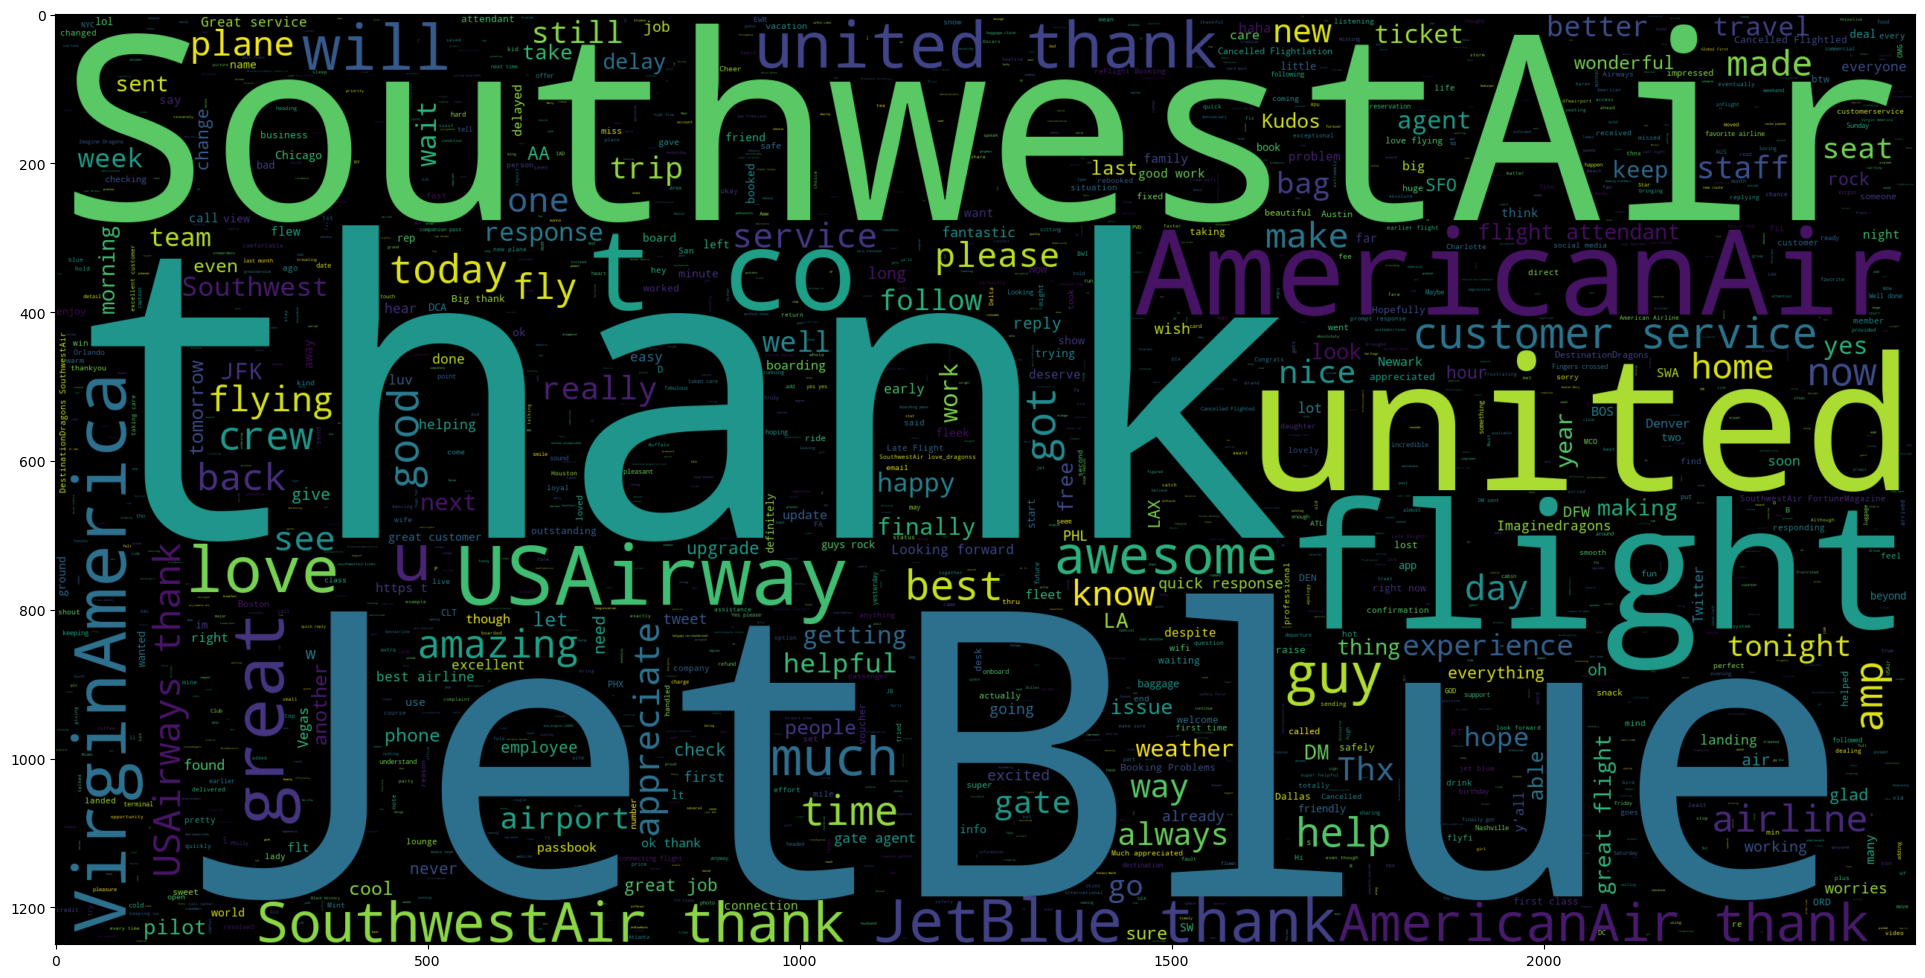

In [17]:
plt.figure(figsize=(24,20))
world_cloud_positive=WordCloud(min_font_size=3,max_words=3200,width=2500,height=1250).generate("".join(positive))
plt.imshow(world_cloud_positive,interpolation='bilinear') # The plt.imshow() function in matplotlib is used to display an image or an array as a 2D plot. It takes an array-like object as input and creates a visual representation of the data.In the context of word clouds, plt.imshow() is commonly used to display the word cloud image generated by the WordCloud object. The word cloud image is essentially a visual representation of text data, where the size and position of each word in the image correspond to its frequency or importance in the original text,  interpolation: The interpolation method to be used when displaying the image. It determines how the array values are interpolated between pixels to create a smooth image. Common options include 'nearest', 'bilinear', and 'bicubic'.
ax.grid(False)

### World could of Neutral sentiments

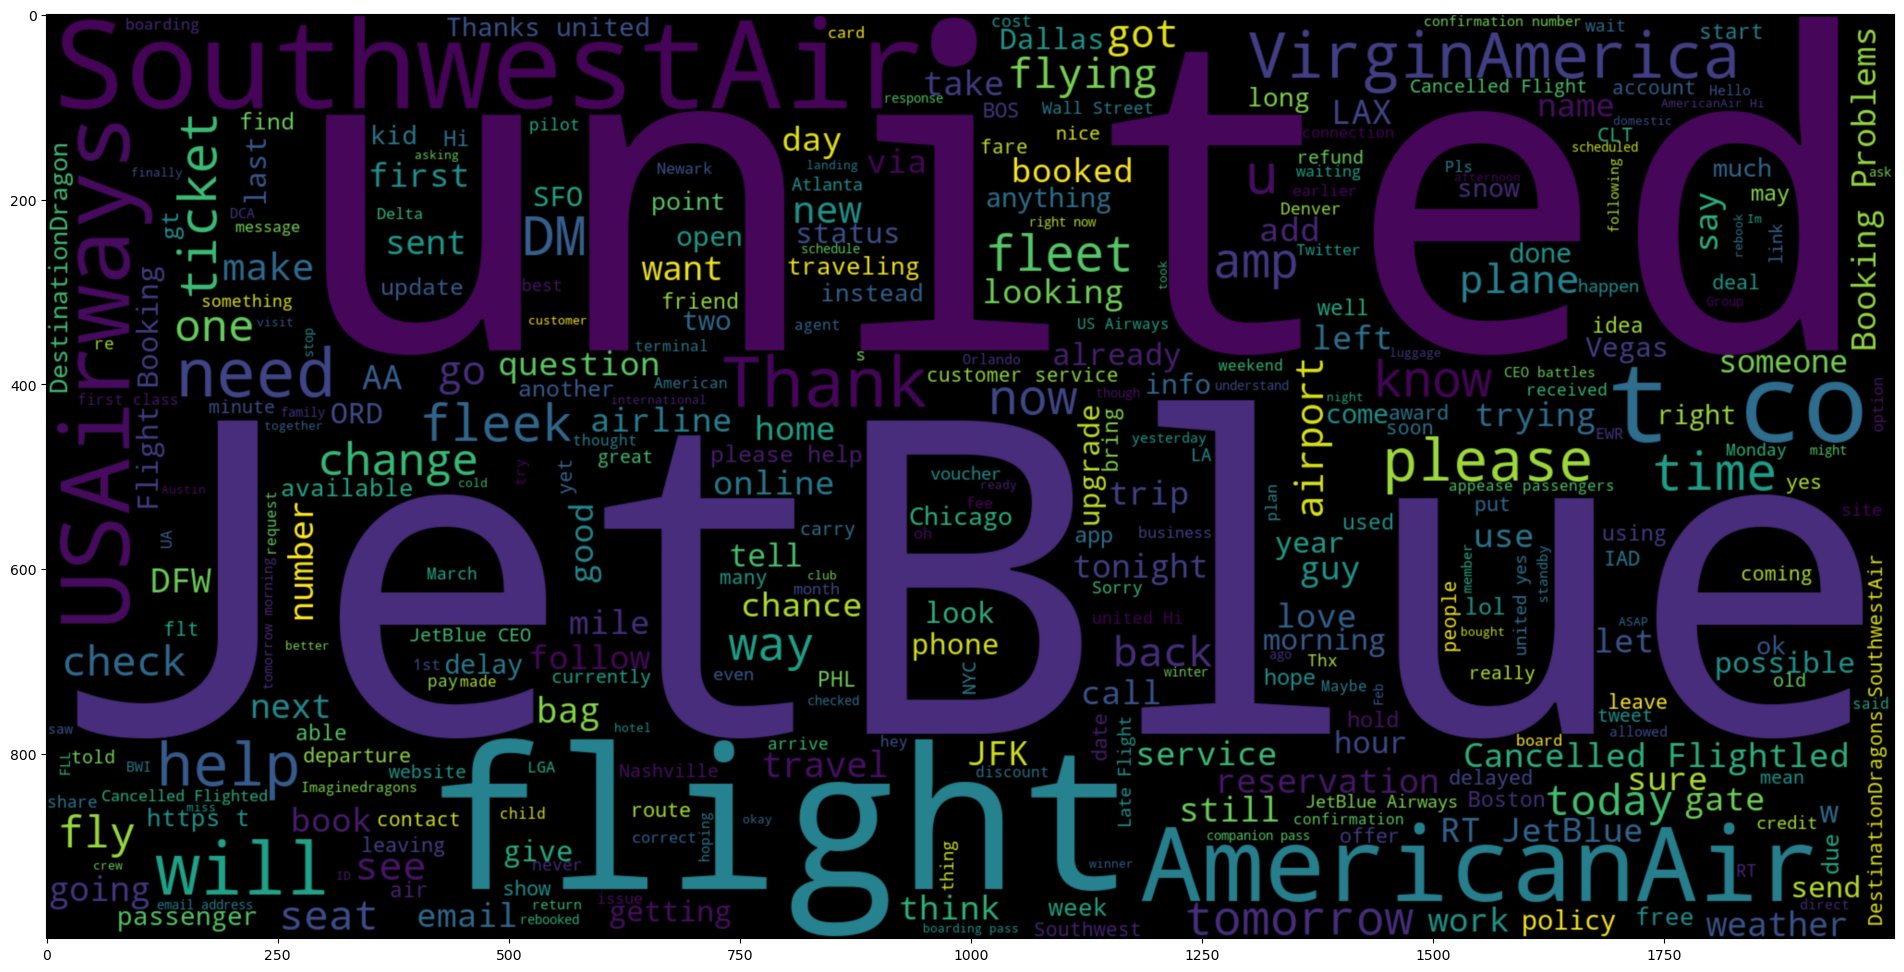

In [18]:
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=13,max_words=3200,width=2000,height=1000).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bicubic')
ax.grid(False)

### World could of Negative sentiments

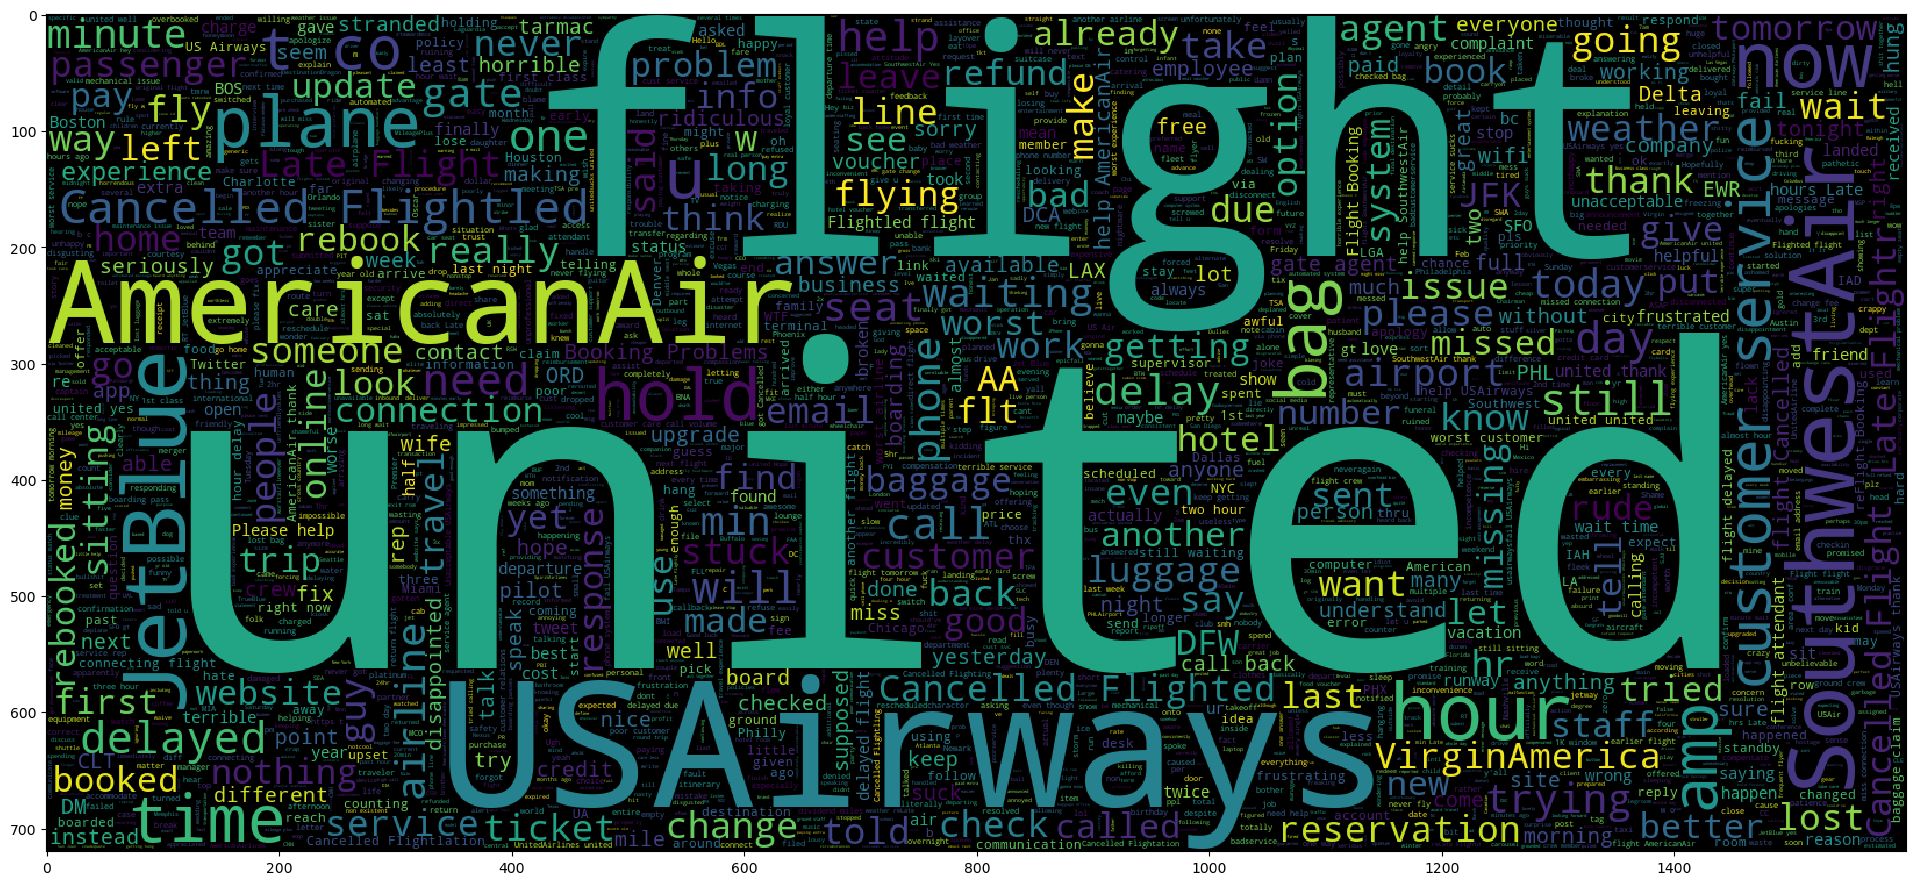

In [19]:
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'nearest')
ax.grid(False)


### TEXT PREPROCESSING AND CLEANING

In [20]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if sentiment =="positive":
        return 2
    elif sentiment == 'neutral':
        return 1
    elif sentiment =='negative':
        return 0

In [21]:
# Apply convert_Sentiment function
df.airline_sentiment =df.airline_sentiment.apply(lambda x: convert_Sentiment(x))

In [22]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric = = The function receives the input text as a parameter and assigns it to the variable words. The re.findall() function is used with a regular expression pattern to find all sequences of non-whitespace characters ([^\W\d_]+) or digits (\d+) in the words text. [^\W\d_]+ matches one or more non-whitespace characters. This pattern matches alphabetic characters (both lowercase and uppercase) and underscores. | is the regex OR operator, allowing the pattern to match either non-whitespace characters or digits. \d+ matches one or more digits. The re.findall() function returns a list of all matching sequences found in the text. The resulting list of words and numbers is joined back together into a single string using the .join() method with a space as the separator. This effectively separates the alphanumeric characters in the text by adding spaces between them. The modified text is then returned as the output of the function.
def seperate_alphanumeric(text):   #   text = "Hello123World456" output = separate_alphanumeric(text) print(output) Output: "Hello 123 World 456"
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text): # The function unique_char takes two parameters: rep and text. rep represents a replacement pattern, and text is the input text to process. The re.sub() function is used to perform a regex-based substitution in the text string. It searches for matches of the regular expression pattern (|w)|1+ and replaces them with the string specified by the rep parameter. The (|w) part of the pattern matches an empty string or a word character. The 1+ part of the pattern matches one or more occurrences of the digit '1'. The re.sub() function replaces all occurrences of the pattern with the rep string, resulting in the modified version of the text string. The modified string is assigned to the variable substitute. Finally, the modified string (substitute) is returned as the output of the function. Here's an example to demonstrate the usage of the unique_char() function: python Copy text = "Helloooo Woooorld!!" replacement = "-" output = unique_char(replacement, text) print(output) Output: "Hello- World-!" In this example, the input text is "Helloooo Woooorld!!". The function replaces the repeated characters ('o' and 'o' in "Helloooo" and 'o' in "Woooorld") with the replacement string "-", resulting in the output "Hello- World-!".
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

The code you provided includes several text preprocessing steps to clean and modify the text data before performing sentiment analysis. Each step serves a specific purpose to improve the quality of the text data for sentiment analysis. Here's an explanation of each step:

1. **Remove Stopwords**: Stopwords are commonly used words (e.g., "the," "is," "and") that do not carry significant meaning in the context of sentiment analysis. Removing stopwords helps reduce noise and focus on more meaningful words that contribute to sentiment.

2. **Remove URLs**: URLs typically do not provide valuable information for sentiment analysis and can introduce noise in the text data. Removing URLs helps remove irrelevant information.

3. **Remove Punctuation**: Punctuation marks do not usually carry sentiment information and can be safely removed to simplify the text data.

4. **Remove HTML**: If the text data contains HTML tags, removing them is essential to eliminate any markup or formatting that may interfere with sentiment analysis.

5. **Remove Usernames**: Usernames (starting with '@') are often included in tweets but do not contribute to sentiment analysis. Removing usernames helps focus on the main content of the text.

6. **Remove Emojis**: Emojis are graphical representations used in text and may not directly convey sentiment. Removing emojis helps simplify the text and avoid potential complications in sentiment analysis.

7. **Decontraction**: Decontraction converts contracted forms of words (e.g., "won't" to "will not") to their expanded forms. This step ensures consistent representation of words and can improve sentiment analysis accuracy.

8. **Separate Alphanumeric**: This step separates alphanumeric characters from words to handle cases where they are combined. For example, "hello123" will be separated as "hello 123" to treat numbers and words as distinct entities.

9. **Replace Repeated Characters**: This step replaces repeated characters with a single occurrence. For instance, "cooooool" will be replaced with "cool" to focus on the base word.

10. **Remove Non-Alphabetic Characters**: This step removes any characters that are not alphabetic (e.g., special symbols, numbers) to maintain only text-based information.

11. **Lowercase**: Converting the text to lowercase helps standardize the text and avoid treating the same word with different cases as different entities during sentiment analysis.

These preprocessing steps collectively aim to clean the text data, remove irrelevant or noisy information, and normalize the text for sentiment analysis. By applying these steps, you can enhance the accuracy and effectiveness of sentiment analysis algorithms by focusing on the most relevant and meaningful aspects of the text.

Certainly! Let's go through the code step by step and explain the working flow of each function:

1. **remove_stopwords(text)**: This function takes a string of text as input and removes the stopwords from it. Stopwords are common words that often do not carry much meaning in the context of natural language processing tasks. The function splits the text into individual words, checks if each word is a stopword using a list of stopwords from the NLTK library, and joins the non-stopwords back into a string.

2. **remove_url(text)**: This function removes URLs from the text. It uses regular expressions to match and remove URLs starting with "http://" or "www." The `re.sub()` function is used to substitute the matched URLs with an empty string.

3. **remove_punct(text)**: This function removes punctuation from the text. It creates a translation table using `str.maketrans()` and `string.punctuation` which maps each punctuation character to `None`. Then, it uses the `translate()` method to remove the punctuation characters from the text.

4. **remove_html(text)**: This function removes HTML tags from the text. It uses regular expressions to match and remove any text enclosed in angle brackets ("<" and ">"). The `re.sub()` function is used to substitute the matched HTML tags with an empty string.

5. **remove_username(text)**: This function removes usernames from the text. It uses regular expressions to match and remove any word starting with "@" followed by one or more non-whitespace characters. The `re.sub()` function is used to substitute the matched usernames with an empty string.

6. **remove_emoji(text)**: This function removes emojis from the text. It uses a regular expression pattern that matches various Unicode ranges representing emojis. The `re.sub()` function is used to substitute the matched emojis with an empty string.

7. **decontraction(text)**: This function expands contractions in the text. It uses regular expressions to replace contracted forms of words with their expanded forms. For example, "won't" is replaced with "will not", "can't" is replaced with "can not", and so on.

8. **separate_alphanumeric(text)**: This function separates alphanumeric characters in the text. It uses the `re.findall()` function to find all sequences of non-whitespace characters (`[^\W\d_]+`) or digits (`\d+`) in the text. The resulting words and numbers are joined back together into a single string.

9. **cont_rep_char(text)**: This function is a helper function used within the `unique_char()` function. It checks if a character in the text is repeated and if it is, only the first two characters are returned.

10. **unique_char(rep, text)**: This function replaces repeated characters in the text with a single occurrence. It uses the `re.sub()` function to substitute repeated characters or digits with the specified replacement string (`rep`).

11. **char(text)**: This function removes non-alphabetic characters from the text. It uses the `re.sub()` function to substitute any character that is not a letter with a space.

After defining these functions, the code applies them to a DataFrame column called `final_text` using the `.apply()` method. Each function is applied sequentially to the `final_text` column, transforming the text data according to the defined functions.

It's important to note that the code you provided is missing the import statements and the DataFrame (`df`) initialization, so some parts may not work as expected without the necessary dependencies and data.

along with this theory just add small example sand give output before and after removing  different text types in these each tasks

In [26]:
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [27]:
x=df['final_text']
y=df['airline_sentiment']

### Observation 

- Here iam trying to pass the final_text in x varaible and the final_text which is description or review of the airlines now iam going to train a model by using this final_text data 

- And in the y varaible iam trying to pass the review type either postive ,neutral, negative and iam changed those sentimental reviews from  postive ,neutral, negative to 2,1,0


### Now Apply TFIDF on cleaned tweets

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_final = tfidf.fit_transform(x)


### What is TfidVectorizer()

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in information retrieval and text mining to measure the importance of a term in a document or corpus. It is commonly used to represent text documents as feature vectors in machine learning algorithms.

**TF-IDF consists of two main components:**

- **Term Frequency (TF):** It measures the frequency of a term within a document. The intuition is that the more frequently a term appears in a document, the more important it is to that document.

- **Inverse Document Frequency (IDF):** It measures the rarity or uniqueness of a term across the entire corpus. The idea is that terms that appear in many documents are less informative compared to terms that appear in a limited number of documents.

The TF-IDF score for a term in a document is calculated as the product of its TF and IDF values. A higher TF-IDF score indicates that a term is more important to a specific document compared to other documents in the corpus.


- TfidfVectorizer() is a class provided by the scikit-learn library, which is commonly used for text feature extraction. It combines the functionality of both the TF (Term Frequency) and IDF (Inverse Document Frequency) components of the TF-IDF calculation into a single step.

- When applied to the sentimental analysis of the US airline dataset, TfidfVectorizer() is used to convert the textual data (tweets) into a numerical representation that can be used as input for machine learning algorithms. Here's why it is used:

- **Text Preprocessing:** Before using TfidfVectorizer(), the text data needs to be preprocessed, including steps like cleaning, tokenization, removing stopwords, and stemming/lemmatization. Once the text data is cleaned and prepared, TfidfVectorizer() takes care of the term frequency and inverse document frequency calculations automatically.

- **Feature Extraction:** TfidfVectorizer() converts a collection of text documents into a matrix of TF-IDF features. Each row in the resulting matrix represents a document (tweet), and each column represents a unique term (word) in the corpus. The value in each cell of the matrix represents the TF-IDF score of the term within the corresponding document.

- **Term Importance:** By using TF-IDF scoring, TfidfVectorizer() assigns higher weights to terms that are more relevant or unique to individual documents. This helps in capturing the importance of different words and phrases within the tweets, which can be crucial in sentimental analysis.

- **Dimensionality Reduction:** The resulting TF-IDF matrix can be high-dimensional, especially if the dataset contains a large number of unique terms. High dimensionality can lead to computational and performance issues. However, TfidfVectorizer() provides options to control the maximum number of features or the minimum document frequency, allowing for dimensionality reduction as needed.

- **Input for Machine Learning:** Once the tweets are transformed into numerical TF-IDF vectors, they can be used as input features for training machine learning models. Classifiers or regression models can be trained on the TF-IDF vectors to predict sentiment labels, such as positive, negative, or neutral, based on the textual content of the tweets.

In summary, TfidfVectorizer() is used in the sentimental analysis of the US airline dataset to convert the text data into a numerical representation that captures term importance and enables machine learning models to process and analyze the sentiment expressed in the tweets effectively.

### HANDLING IMBALANCE

In [66]:
# Handling imbalanced using SMOTE
smote=SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [67]:
# Split Data into train & test
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)


### Random Forest

In [40]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

### Now Randome Forest Accuracy Score

In [46]:
accuracy_score(random_forest_classifier_prediction,y_test)

0.9612144102266125

### Now XGBClassifier

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [48]:
xgb_prediction =  xgb.predict(X_test)

### Now XGBClassifier Accuracy Score

In [49]:
accuracy_score(xgb_prediction,y_test)

0.9243172574084835

### Gradient Boosting Classifier

In [50]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [51]:
gbc_prediction =  gbc.predict(X_test)

### Now Gradient Boosting Classifier Accuracy Score

In [52]:
accuracy_score(gbc_prediction,y_test)

0.8803021499128414

### Support vector machine

In [54]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [55]:
svm_prediction =  svm.predict(X_test)

### Now Support vector machine Accuracy Score

In [56]:
accuracy_score(svm_prediction,y_test)

0.9414584543869843

### Naive Bayes

In [57]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [58]:
nb_prediction =  nb.predict(X_test)

### Now Naive Bayes Accuracy Score


In [59]:
accuracy_score(nb_prediction,y_test)

0.8691167925624637

### Decision Tree

In [60]:
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
des_tree_classifier_prediction=des_tree_classifier.predict(X_test)

### Now Decision Tree Classifier Accuracy Score

In [62]:
accuracy_score(des_tree_classifier_prediction,y_test)

0.9388436955258571

### VISUALIZE MODEL PERFORMENCE

In [63]:
cr = classification_report(y_test, random_forest_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2343
           1       0.95      0.94      0.94      2264
           2       0.95      0.95      0.95      2277

    accuracy                           0.96      6884
   macro avg       0.96      0.96      0.96      6884
weighted avg       0.96      0.96      0.96      6884



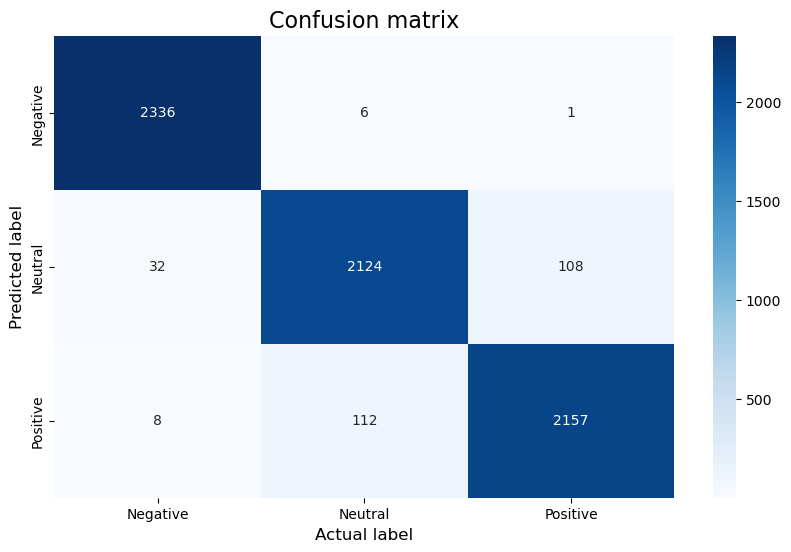

In [64]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,random_forest_classifier_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()